# Zuber Ride Sharing Data Analysis

## Introduction 

While working as an analyst for Zuber, a new ride-sharing company that is launching in Chicago. Our task is to find patterns in the available information to understand passenger preferences and the impact of external factors on rides.


### Objectives 

1. Analyze the number of rides for each taxi company for specific dates.
2. Analyze the number of rides for companies containing specific keywords.
3. Analyze the number of rides for specific companies compared to others.
4. Test a hypothesis about the impact of weather on ride duration.

## Import Necessary Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Load Data 

In [2]:
project_sql_result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
project_sql_result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
project_sql_result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')


- Loading all cvs files from SQL results

In [3]:
# Display the first few rows of each dataframe
project_sql_result_01.head(), project_sql_result_04.head(), project_sql_result_07.head()

(                      company_name  trips_amount
 0                        Flash Cab         19558
 1        Taxi Affiliation Services         11422
 2                Medallion Leasing         10367
 3                       Yellow Cab          9888
 4  Taxi Affiliation Service Yellow          9299,
   dropoff_location_name  average_trips
 0                  Loop   10727.466667
 1           River North    9523.666667
 2         Streeterville    6664.666667
 3             West Loop    5163.666667
 4                O'Hare    2546.900000,
               start_ts weather_conditions  duration_seconds
 0  2017-11-25 16:00:00               Good            2410.0
 1  2017-11-25 14:00:00               Good            1920.0
 2  2017-11-25 12:00:00               Good            1543.0
 3  2017-11-04 10:00:00               Good            2512.0
 4  2017-11-11 07:00:00               Good            1440.0)

### Prepare Data 

In [4]:
# Display basic information and data types
print(project_sql_result_01.info())
print(project_sql_result_04.info())
print(project_sql_result_07.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   d

- Dataframe `project_sql_result_01` contains 2 columns, 64 rows, and no missing values. Which includes the following data:
    - `company_name`: taxi company name
    - `trips_amount`: the number of rides for each taxi company on November 15-16, 2017.


- Dataframe `project_sql_result_04` contains 2 columns, 94 rows and no missing values. Which includes the following data:

    - `dropoff_location_name`: Chicago neighborhoods where rides ended

    - `average_trips`: the average number of rides that ended in each neighborhood in November 2017.


- Dataframe `project_sql_result_07` contains 3 columns, 1068 rows, and no missing values. Which includes data on rides from the Loop to O'Hare International Airport. These are the table's field values:

    - `start_ts`:pickup date and time
    - `weather_conditions`: weather conditions at the moment the ride started
    - `duration_seconds`: ride duration in seconds

In [5]:
#check for duplicates

project_sql_result_01.duplicated().sum(), project_sql_result_04.duplicated().sum(), project_sql_result_07.duplicated().sum()

(0, 0, 197)

While checking for duplicates we discover `project_sql_result_07` is the only dataframe containing duplicates. 
    
   - There are 197 duplicates in the `project_sql_result_07`dataframe 

We will make the assumption that there was not 197 instances in which customers started and ended rides at the same exact time  to the same location and drop the duplicated values.

In [6]:
#drop duplicates
project_sql_result_07=project_sql_result_07.drop_duplicates()

project_sql_result_07.duplicated().sum()


0

## Exploratory Data Analysis

### Top 10 Neighborhoods by Drop-off

Now we will use the `porject_sql_result_04` dataframe to identify the top 10 neighborhoods in terms of drop off.

In [7]:
#identifying top 10 neighborhoodsin by avg trips
top_10_neighborhoods=project_sql_result_04.nlargest(10, 'average_trips')
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


This list shows us that there is a large range of average number of trips between the top cities.

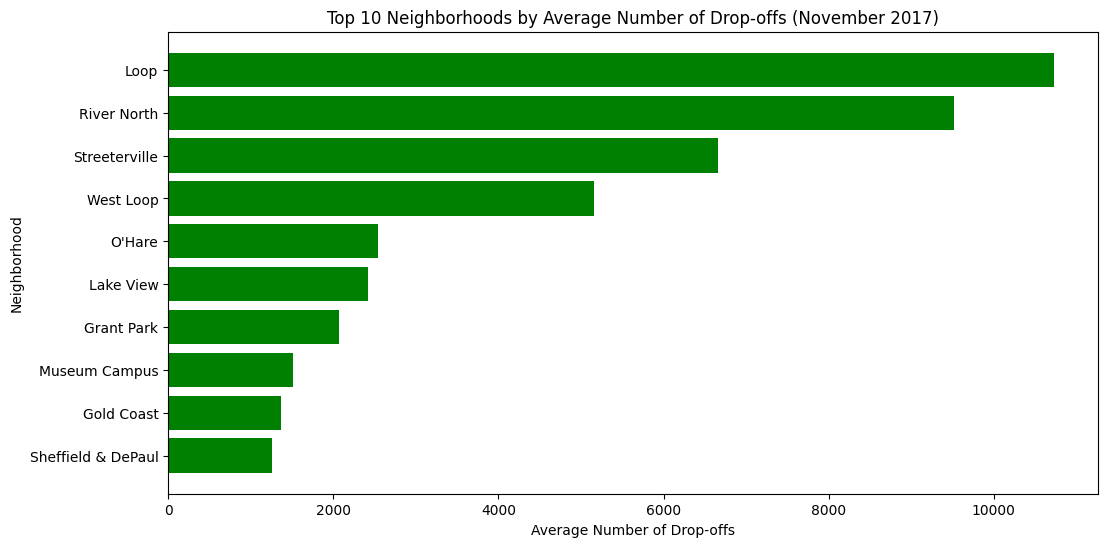

In [8]:
# Plot the top 10 neighborhoods by number of drop-offs
plt.figure(figsize=(12, 6))
plt.barh(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='green')
plt.xlabel('Average Number of Drop-offs')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Average Number of Drop-offs (November 2017)')
plt.gca().invert_yaxis()
plt.show()

The graph shows the top 10 neighborhoods by the average number of drop-offs in November 2017. This helps us identify the most popular destinations within the city during this month. The neigborhood with the most average drop offs is the Loop neighboorhood. 

### Taxi Company vs Number of Rides

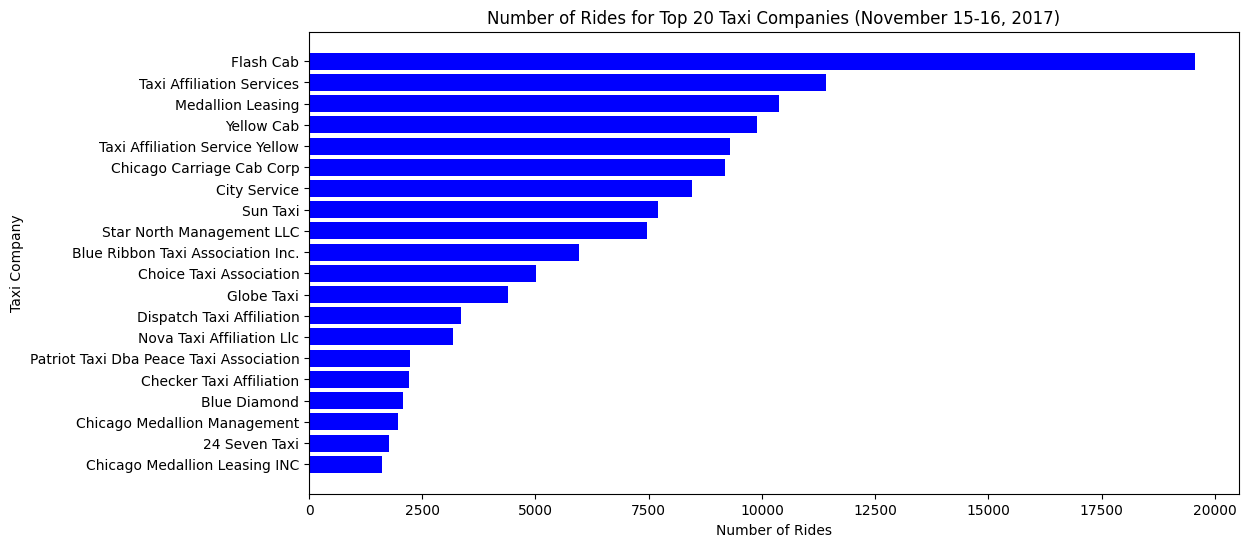

In [9]:
# Sort the data by 'trips_amount' and get the top 20 companies
sorted_data = project_sql_result_01.sort_values(by='trips_amount', ascending=False).head(20)

# Plot the number of rides for each taxi company
plt.figure(figsize=(12, 6))
plt.barh(sorted_data['company_name'], sorted_data['trips_amount'], color='blue')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')
plt.title('Number of Rides for Top 20 Taxi Companies (November 15-16, 2017)')
plt.gca().invert_yaxis()
plt.show()

The graph shows the number of rides for the top 20 taxi companies on November 15-16, 2017. We can see which companies were the most popular during this period. Flash cab was the number one choice during this period with nearly 20,000 rides while the second closest company, Taxi Affiliation Services, had around 12,500 rides.

## Testing Hypotheses

### Hypothesis 1
- Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
    - This hypothesis assumes that weather conditions (rainy vs. other Saturdays) do not impact the ride duration. Essentially, it suggests that any observed differences in ride duration are due to random chance.
- Alternative Hypothesis (H1): The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
    - This hypothesis assumes that weather conditions (rainy Saturdays) do have an impact on the ride duration, indicating that the average duration is different when it rains.

Significance Level:
- We will set the significance level (alpha) at 0.05.

In [10]:
# Separate data into two groups: rainy Saturdays and other Saturdays
rainy_saturdays = project_sql_result_07[project_sql_result_07['weather_conditions'] == 'Bad']
other_saturdays = project_sql_result_07[project_sql_result_07['weather_conditions'] == 'Good']

# Extract durations
rainy_durations = rainy_saturdays['duration_seconds']
other_durations = other_saturdays['duration_seconds']

# Perform t-test
t_stat, p_value = st.ttest_ind(rainy_durations, other_durations)

# Display results
print('t-statistic:', t_stat)
print('p-value:', p_value)


t-statistic: 5.427957689754561
p-value: 7.397770692813658e-08


The p-value is extremely small (7.397770692813658e-08), which is much less than the significance level of 0.05.

Since the p-value is less than the significance level, we reject the null hypothesis. This means there is statistically significant evidence to suggest that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

This finding can be used to inform operational decisions, such as adjusting schedules or informing passengers about potential delays during rainy weather conditions.

# Conclusion 

Through our analysis, we have identified key patterns in taxi rides in Chicago. We analyzed the number of rides for different taxi companies, identified the top neighborhoods for drop-offs, and tested a hypothesis about the impact of weather on ride duration.

<b>Key Findings</b>
- Flash Cab and Taxi Affiliation Services are among the most popular taxi companies.
- The top neighborhoods for drop-offs include areas with high commercial and tourist activity.
- The hypothesis test results provide insights into how weather conditions affect ride duration, which can help in planning and optimizing operations.

These findings can help Zuber strategize their operations and marketing efforts effectively as they launch in Chicago.